## Análise e Classificação de Reservas de Hotel  
Este notebook contém uma análise exploratória e um modelo de classificação aplicado a um conjunto de dados de reservas de hotel. O objetivo é entender os padrões presentes nas reservas e prever o status das reservas com base em diversas características.  
  
O notebook está dividido em várias seções, cada uma realizando uma etapa específica do processo de análise e modelagem:  
  
1) Preparação dos Dados: Carregamento dos dados, identificação de variáveis categóricas e pré-processamento.
2) Análise Exploratória: Exploração das características dos dados e visualização de padrões.
3) Engenharia de Recursos: Criação de variáveis dummy para características categóricas e codificação de rótulos.
4) Modelagem: Treinamento de um modelo de árvore de decisão para prever o status das reservas.
5) Avaliação do Modelo: Avaliação da precisão do modelo e análise da matriz de confusão.
  
Cada célula de código é acompanhada de comentários explicativos para facilitar a compreensão do processo realizado em cada etapa.  


* Importação das bibliotecas Pandas e NumPy.
* Leitura de um arquivo CSV chamado 'Hotel Reservations.csv' e armazenamento dos dados em um DataFrame chamado df.
* Exibição dos cinco primeiros registros do DataFrame.

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('../Data/Hotel Reservations.csv', sep=',')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


* Iteração sobre as colunas do DataFrame.
* Para cada coluna, imprime o nome da coluna e o número de valores únicos presentes nela.

In [2]:
for c in df.columns:
    print(f"{c:40s} - {df[c].nunique():>5d}")

Booking_ID                               - 36275
no_of_adults                             -     5
no_of_children                           -     6
no_of_weekend_nights                     -     8
no_of_week_nights                        -    18
type_of_meal_plan                        -     4
required_car_parking_space               -     2
room_type_reserved                       -     7
lead_time                                -   352
arrival_year                             -     2
arrival_month                            -    12
arrival_date                             -    31
market_segment_type                      -     5
repeated_guest                           -     2
no_of_previous_cancellations             -     9
no_of_previous_bookings_not_canceled     -    59
avg_price_per_room                       -  3930
no_of_special_requests                   -     6
booking_status                           -     2


* Remoção da coluna "Booking_ID" do DataFrame usando o método drop.
* Exibição do DataFrame após a remoção da coluna.

In [3]:
df = df.drop("Booking_ID", axis = 1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


* Criação de variáveis dummy para as colunas categóricas do DataFrame usando a função `pd.get_dummies`.

In [4]:
typeofmealplaDummies = pd.get_dummies(df["type_of_meal_plan"], prefix = "type_of_meal_plan")
roomtypereservedDummies = pd.get_dummies(df["room_type_reserved"], prefix = "room_type_reserved")
marketsegmenttypeDummies = pd.get_dummies(df["market_segment_type"], prefix = "market_segment_type")
requiredcarparkingspaceDummies = pd.get_dummies(df["required_car_parking_space"], prefix = "required_car_parking_space")

* Concatenação das variáveis dummy criadas anteriormente ao DataFrame original ao longo do eixo das colunas.

In [5]:
df = pd.concat([df, typeofmealplaDummies], axis = 1)
df = pd.concat([df, roomtypereservedDummies], axis = 1)
df = pd.concat([df, marketsegmenttypeDummies], axis = 1)
df = pd.concat([df, requiredcarparkingspaceDummies], axis = 1)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,required_car_parking_space_0,required_car_parking_space_1
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,False,False,False,False,False,False,True,False,True,False
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,False,False,False,False,False,False,False,True,True,False
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,False,False,False,False,False,False,False,True,True,False
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,False,False,False,False,False,False,False,True,True,False
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,...,False,False,False,False,False,False,False,True,True,False
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,...,False,False,False,False,False,False,False,True,True,False
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,...,False,False,False,False,False,False,False,True,True,False
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,...,False,False,False,False,False,False,False,True,True,False


* Codificação da coluna "_booking_status_" usando o LabelEncoder do `scikit-learn` para converter os rótulos em números inteiros.
* Exibição do DataFrame após a codificação.

In [6]:
from sklearn.preprocessing import LabelEncoder
df["booking_status"] = LabelEncoder().fit_transform(df["booking_status"])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,required_car_parking_space_0,required_car_parking_space_1
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,False,False,False,False,False,False,True,False,True,False
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,False,False,False,False,False,False,False,True,True,False
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,False,False,False,False,False,False,False,True,True,False
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,False,False,False,False,False,False,False,True,True,False
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,...,False,False,False,False,False,False,False,True,True,False
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,...,False,False,False,False,False,False,False,True,True,False
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,...,False,False,False,False,False,False,False,True,True,False
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,...,False,False,False,False,False,False,False,True,True,False


* Remoção das colunas "type_of_meal_plan", "room_type_reserved" e "market_segment_type" do DataFrame.

In [7]:
df = df.drop("type_of_meal_plan", axis = 1)
df = df.drop("room_type_reserved", axis = 1)
df = df.drop("market_segment_type", axis = 1)

* Separação do DataFrame em conjuntos de características (X) e rótulos (y).
* Divisão dos conjuntos de treinamento e teste usando `train_test_split` do `scikit-learn`.

In [8]:
X = df.drop("booking_status", axis = 1)
y = df["booking_status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

* Cálculo da correlação entre cada característica e o rótulo ("booking_status").

In [9]:
df.corr()['booking_status']

no_of_adults                           -0.086920
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_week_nights                      -0.092996
required_car_parking_space              0.086185
lead_time                              -0.438538
arrival_year                           -0.179529
arrival_month                           0.011233
arrival_date                           -0.010629
repeated_guest                          0.107287
no_of_previous_cancellations            0.033728
no_of_previous_bookings_not_canceled    0.060179
avg_price_per_room                     -0.142569
no_of_special_requests                  0.253070
booking_status                          1.000000
type_of_meal_plan_Meal Plan 1           0.061267
type_of_meal_plan_Meal Plan 2          -0.086370
type_of_meal_plan_Meal Plan 3           0.003193
type_of_meal_plan_Not Selected         -0.003072
room_type_reserved_Room_Type 1          0.020326
room_type_reserved_R

## Árvore de Decisão

* Inicialização e ajuste de um classificador de árvore de decisão aos dados de treinamento.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clfDT = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             random_state=42, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             class_weight=None, 
                             ccp_alpha=0.0,
                             monotonic_cst=None)
clfDT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

* Cálculo dos indicadores do classificador usando os dados de teste.

In [14]:
print(classification_report(y_test, clfDT.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      3607
           1       0.90      0.90      0.90      7276

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



* Cálculo e exibição da matriz de confusão usando os rótulos verdadeiros e preditos.

In [15]:
from sklearn.metrics import confusion_matrix

cmDT = confusion_matrix(y_test, clfDT.predict(X_test))
print('Matriz de Confusão:')
print(cmDT)

Matriz de Confusão:
[[2907  700]
 [ 752 6524]]


## KNN

##### Nas células a seguir, estamos realizando classificação utilizando o algoritmo K-Vizinhos Mais Próximos (KNN) juntamente com a técnica de validação cruzada para avaliar o desempenho do modelo. O KNN é um algoritmo de aprendizado supervisionado que classifica os pontos de dados com base na classe majoritária dos seus vizinhos mais próximos.  

1) Importação de Bibliotecas: Primeiramente, importamos a classe `KNeighborsClassifier` do módulo `neighbors` do `scikit-learn`, além do `cross_val_score` para realizar validação cruzada e `matplotlib.pyplot` para visualização.
2) Inicialização do Classificador: Instanciamos o classificador KNN com os parâmetros padrão.
3) Validação Cruzada: Utilizamos a função `cross_val_score` para avaliar o desempenho do modelo através da validação cruzada. Essa função divide os dados em _k_ partes iguais e, para cada iteração, uma parte é usada como conjunto de teste enquanto as outras partes são usadas como conjunto de treinamento.
4) Avaliação do Desempenho: Calculamos a média dos escores de validação cruzada para avaliar o desempenho do modelo.
5) Visualização dos Resultados: Utilizamos `matplotlib.pyplot` para plotar um gráfico que mostra como o desempenho do modelo varia com o número de vizinhos.
Essas etapas nos ajudarão a entender como o desempenho do modelo KNN é afetado pelo número de vizinhos e a escolher o melhor valor para esse parâmetro.  
É recomendável que o valor de K não seja maior do que o numero de features usadas, portanto, vamos limitar a iteração ao número de colunas em _*X*_

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 16/16 [00:29<00:00,  1.82s/it]


Text(0, 0.5, 'Accuracy')

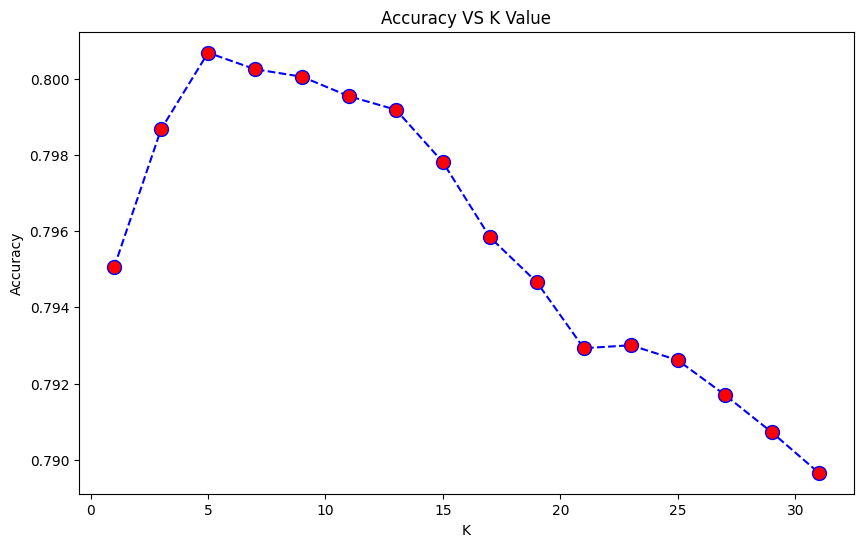

In [17]:
score_rate = []

for i in tqdm(range(1,X_train.shape[1], 2)):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    score_rate.append(accuracy)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,X_train.shape[1], 2), score_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Accuracy VS K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

* Usando o método do cotovelo, podemos ver que o ponto ótimo para treinamento é com 5 vizinhos. 
* O próximo passo é a inicialização e ajuste de um classificador de KNN aos dados de treinamento.

In [18]:
clfKNN = KNeighborsClassifier(
    n_neighbors=5, 
    weights='uniform', 
    algorithm='auto', 
    leaf_size=30, 
    p=2, 
    metric='minkowski', 
    metric_params=None, 
    n_jobs=None)

clfKNN.fit(X_train, y_train)

KNeighborsClassifier()

* Cálculo dos indicadores do classificador usando os dados de teste.

In [19]:
print(classification_report(y_test, clfKNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.63      0.68      3607
           1       0.83      0.90      0.86      7276

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



* Cálculo e exibição da matriz de confusão usando os rótulos verdadeiros e preditos.

In [21]:
cmKNN = confusion_matrix(y_test, clfKNN.predict(X_test))
print('Matriz de Confusão:')
print(cmKNN)

Matriz de Confusão:
[[2260 1347]
 [ 763 6513]]


## Conclusão
  
Com base nos scores fornecidos, parece que o modelo Decision Tree apresentou um desempenho superior ao modelo KNN para o problema específico em questão.  

* O _F1-score_ do modelo Decision Tree é mais alto do que o do modelo KNN para ambas as classes. Isso sugere que o modelo de árvore de decisão tem um melhor equilíbrio entre precisão e recall.
* Tanto os socres de _Recall_ quanto o de _Precision_ do modelo Decision Tree são mais altos do que os do modelo KNN para ambas as classes, mas a diferença não é muito significativa - o modelo KNN apresenta uma precisão um pouco mais baixa para a classe 0, mas uma precisão comparável para a classe 1. No entanto, o recall para a classe 0 é significativamente mais baixo em comparação com o modelo de árvore de decisão, enquanto o recall para a classe 1 é um pouco mais alto.
* A acurácia geral do modelo KNN é de 0.81, o que é um pouco menor do que a do modelo Decision Tree (0.87). No entanto, as diferenças não são tão significativas.
  
Com base nessas observações, podemos concluir que, para o conjunto de dados e o problema específico em questão, o modelo Decision Tree parece ser uma escolha ligeiramente melhor em termos de equilíbrio entre precisão, recall e acurácia.   
Importante ressaltar que em nenhum dos modelos, a parametrização foi alvo de estudo até o momento.  Trabalhos futuros podem considerar uma otimização como alvo de estudo, além do balanceamento do conjunto de treino/teste, utilizando técnicas de undersampling ou oversamplig, data augmentation ou SMOTE. 
  
Além disso, outras conclusões podem ser destacadas: 
* **Interpretabilidade**: Se for uma preocupação importante e o conjunto de dados não for extremamente grande, o modelo Decision Tree terá uma vantagem significativa. 
* **Tempo de Treinamento**: o modelo Decision Tree geralmente levará menos tempo para treinar do que o modelo KNN. 
* **Escalabilidade**: o KNN pode ser preferível, especialmente em conjuntos de dados menores ou com dimensionalidade moderada.